In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from tabulate import tabulate

In [2]:
data_train=pd.read_csv('train-new.csv')
data_test=pd.read_csv('test-new.csv')

In [3]:
data_train.head()

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,caseid,injSeverity
0,55+,53.342,dead,airbag,belted,1,f,48,2002,1997,deploy,driver,1,45:150:1,3
1,25-39,154.960,alive,none,none,1,m,26,2001,1968,unavail,driver,0,76:40:1,3
2,55+,38.994,alive,none,none,1,f,51,2002,1994,unavail,driver,0,11:184:1,3
3,25-39,168.568,alive,airbag,belted,1,m,27,1998,1996,deploy,pass,1,9:17:1,3
4,10-24,27.751,alive,airbag,belted,0,m,26,2002,1997,nodeploy,pass,0,2:2:2,0


In [4]:
data_train.describe()

,weight,frontal,ageOFocc,yearacc,yearVeh,deploy,injSeverity
count,17565.000000,17565.000000,17565.000000,17565.000000,17565.000000,17565.000000,17565.000000
mean,458.763017,0.643439,37.212411,1999.558497,1992.843894,0.340165,1.713066
std,1471.148421,0.478997,17.945232,1.702162,5.568838,0.473778,1.290565
min,0.000000,0.000000,16.000000,1997.000000,1953.000000,0.000000,0.000000
25%,32.264000,0.000000,22.000000,1998.000000,1989.000000,0.000000,1.000000
50%,86.986000,1.000000,33.000000,2000.000000,1994.000000,0.000000,2.000000
75%,357.283000,1.000000,48.000000,2001.000000,1997.000000,1.000000,3.000000
max,57871.595000,1.000000,97.000000,2002.000000,2003.000000,1.000000,6.000000


In [5]:
data_train['dead'].unique()

array(['dead', 'alive'], dtype=object)

In [6]:
data_train['dead']=data_train['dead'].map({'dead':0, 'alive':1})

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dead', ylabel='count'>

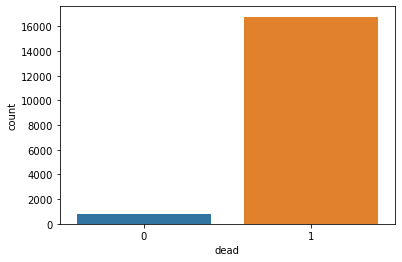

In [7]:
sns.countplot(data_train['dead'])

In [8]:
data_train['airbag'].unique()

array(['airbag', 'none'], dtype=object)

In [9]:
data_train['airbag']=data_train['airbag'].map({'airbag':1, 'none':1})

In [10]:
data_train['seatbelt'].unique()

array(['belted', 'none'], dtype=object)

In [11]:
data_train['seatbelt']=data_train['seatbelt'].map({'belted':1, 'none':0})

In [12]:
data_train['sex'].unique()

array(['f', 'm'], dtype=object)

In [13]:
data_train['sex']=data_train['sex'].map({'f':0, 'm':1})

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

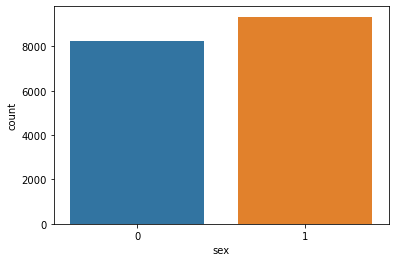

In [14]:
sns.countplot(data_train['sex'])

In [15]:
data_train['injSeverity'].unique()

array([3, 0, 2, 1, 4, 5, 6], dtype=int64)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='injSeverity', ylabel='count'>

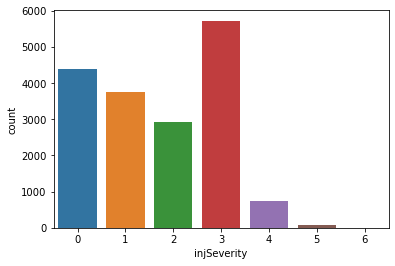

In [16]:
sns.countplot(data_train['injSeverity'])

In [17]:
data_train['injSeverity']=data_train['injSeverity'].map({0:0,1:0,2:0,3:1,4:1,5:1,6:1})

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='injSeverity', ylabel='count'>

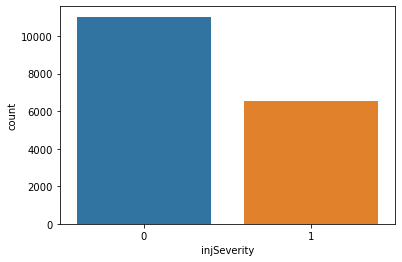

In [18]:
sns.countplot(data_train['injSeverity'])

In [19]:
data_train['ageOFocc'].unique()

array([48, 26, 51, 27, 47, 17, 39, 74, 31, 28, 16, 23, 38, 35, 19, 58, 24,
       79, 50, 66, 54, 44, 73, 69, 34, 56, 21, 29, 37, 40, 25, 45, 18, 67,
       85, 42, 20, 30, 70, 60, 64, 43, 76, 72, 22, 78, 33, 41, 68, 62, 86,
       90, 65, 53, 49, 77, 80, 71, 36, 32, 55, 82, 46, 59, 52, 61, 57, 63,
       88, 75, 87, 81, 83, 84, 97, 91, 89, 92, 93, 96, 94, 95],
      dtype=int64)

In [20]:
def age_group(age):
    if age<=20:
        return 0
    elif age>20 and age<=40:
        return 1
    elif age>40 and age<=60:
        return 2
    elif age>60 and age<=80:
        return 3
    elif age>80 and age<=100:
        return 4

In [21]:
data_train['Group_age']=data_train['ageOFocc'].apply(age_group)

In [22]:
data_train.head()

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,caseid,injSeverity,Group_age
0,55+,53.342,0,1,1,1,0,48,2002,1997,deploy,driver,1,45:150:1,1,2
1,25-39,154.960,1,1,0,1,1,26,2001,1968,unavail,driver,0,76:40:1,1,1
2,55+,38.994,1,1,0,1,0,51,2002,1994,unavail,driver,0,11:184:1,1,2
3,25-39,168.568,1,1,1,1,1,27,1998,1996,deploy,pass,1,9:17:1,1,1
4,10-24,27.751,1,1,1,0,1,26,2002,1997,nodeploy,pass,0,2:2:2,0,1


In [23]:
data_train['yearacc'].unique()

array([2002, 2001, 1998, 1999, 1997, 2000], dtype=int64)

In [24]:
data_train['yearVeh'].unique()

array([1997, 1968, 1994, 1996, 1991, 1987, 2000, 1998, 1988, 1985, 1992,
       1995, 1999, 1989, 1972, 1993, 1990, 1979, 2002, 2001, 1984, 1983,
       1986, 1982, 1966, 1977, 1969, 1973, 1981, 1980, 1978, 1967, 1963,
       1965, 1970, 1975, 1976, 1974, 2003, 1971, 1959, 1953, 1961, 1964],
      dtype=int64)

In [25]:
data_train['abcat'].unique()

array(['deploy', 'unavail', 'nodeploy'], dtype=object)

In [26]:
data_train['abcat']=data_train['abcat'].map({'deploy':0, 'unavail':1, 'nodeploy':2})

In [27]:
data_train['occRole'].unique()

array(['driver', 'pass'], dtype=object)

In [28]:
data_train['occRole']=data_train['occRole'].map({'driver':0, 'pass':1})

In [29]:
data_train.head()

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,caseid,injSeverity,Group_age
0,55+,53.342,0,1,1,1,0,48,2002,1997,0,0,1,45:150:1,1,2
1,25-39,154.960,1,1,0,1,1,26,2001,1968,1,0,0,76:40:1,1,1
2,55+,38.994,1,1,0,1,0,51,2002,1994,1,0,0,11:184:1,1,2
3,25-39,168.568,1,1,1,1,1,27,1998,1996,0,1,1,9:17:1,1,1
4,10-24,27.751,1,1,1,0,1,26,2002,1997,2,1,0,2:2:2,0,1


In [30]:
data_train['dvcat'].unique()

array(['55+', '25-39', '10-24', '40-54', '1-9km/h'], dtype=object)

In [31]:
data_train['dvcat']=data_train['dvcat'].map({'55+':0, '25-39':1, '10-24':2, '40-54':3, '1-9km/h':4})

In [32]:
data_train.head()

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,caseid,injSeverity,Group_age
0,0,53.342,0,1,1,1,0,48,2002,1997,0,0,1,45:150:1,1,2
1,1,154.960,1,1,0,1,1,26,2001,1968,1,0,0,76:40:1,1,1
2,0,38.994,1,1,0,1,0,51,2002,1994,1,0,0,11:184:1,1,2
3,1,168.568,1,1,1,1,1,27,1998,1996,0,1,1,9:17:1,1,1
4,2,27.751,1,1,1,0,1,26,2002,1997,2,1,0,2:2:2,0,1


In [33]:
data_train.drop(['caseid','yearacc'],inplace=True,axis=1)

In [34]:
y = data_train['injSeverity']

In [35]:
data_train.drop(['injSeverity'],inplace=True,axis=1)

In [36]:
data_train

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearVeh,abcat,occRole,deploy,Group_age
0,0,53.342,0,1,1,1,0,48,1997,0,0,1,2
1,1,154.960,1,1,0,1,1,26,1968,1,0,0,1
2,0,38.994,1,1,0,1,0,51,1994,1,0,0,2
3,1,168.568,1,1,1,1,1,27,1996,0,1,1,1
4,2,27.751,1,1,1,0,1,26,1997,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17560,2,131.491,1,1,1,0,1,28,1997,0,0,1,1
17561,2,281.693,1,1,1,1,0,39,1987,1,0,0,1
17562,2,419.418,1,1,1,1,0,29,1988,0,0,1,1
17563,3,9.815,1,1,0,1,0,22,1990,1,0,0,1


In [37]:
data_train.isnull().sum()

dvcat        0
weight       0
dead         0
airbag       0
seatbelt     0
frontal      0
sex          0
ageOFocc     0
yearVeh      0
abcat        0
occRole      0
deploy       0
Group_age    0
dtype: int64

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()

In [40]:
df=scaler.fit_transform(data_train)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.2, random_state = 43)

In [43]:
import statsmodels.api as sm

In [44]:
xc=sm.add_constant(X_train)
mlogit=sm.OLS(y_train,xc)
fmlogit=mlogit.fit()
print(fmlogit.summary())

                            OLS Regression Results                            
Dep. Variable:            injSeverity   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     221.5
Date:                Sat, 13 May 2023   Prob (F-statistic):               0.00
Time:                        10:22:41   Log-Likelihood:                -8491.1
No. Observations:               14052   AIC:                         1.701e+04
Df Residuals:                   14039   BIC:                         1.711e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3695      0.004     98.868      0.0

# KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [47]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [48]:
predict = knn.predict(X_test)

In [49]:
predict

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [50]:
confusion_matrix(y_test,predict)

array([[1653,  525],
       [ 646,  689]], dtype=int64)

In [51]:
KNN=accuracy_score(y_test,predict)

In [52]:
KNN

0.6666666666666666

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='injSeverity', ylabel='Density'>

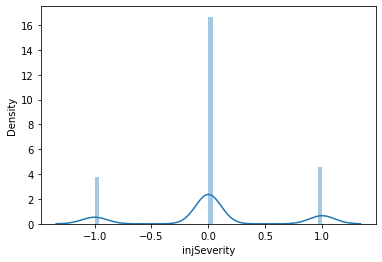

In [53]:
sns.distplot(y_test-predict)

# RandomForest

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
RF = RandomForestClassifier()

In [56]:
RF.fit(X_train,y_train)

RandomForestClassifier()

In [57]:
predict_rf = RF.predict(X_test)

In [58]:
Random = accuracy_score(y_test,predict_rf)

In [59]:
Random

0.7295758610873897

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='injSeverity', ylabel='Density'>

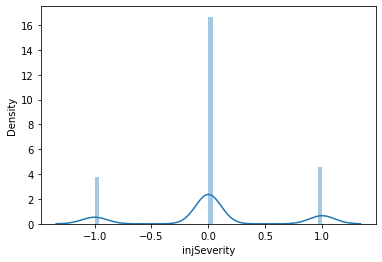

In [60]:
sns.distplot(y_test-predict)

# SVM

In [61]:
from sklearn.svm import SVC

In [62]:
classifier =SVC(kernel='rbf',random_state = 0)

In [63]:
classifier.fit(X_train,y_train)

SVC(random_state=0)

In [64]:
predict = knn.predict(X_test)

In [65]:
SVM = accuracy_score(y_test,predict)

In [66]:
SVM

0.6666666666666666

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='injSeverity', ylabel='Density'>

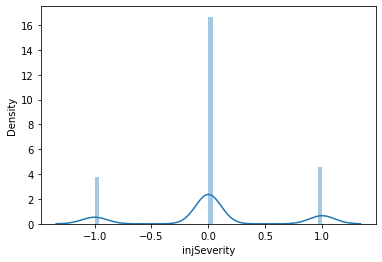

In [67]:
sns.distplot(y_test-predict)

# Logistic

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
log = LogisticRegression()

In [70]:
log.fit(X_train,y_train)

LogisticRegression()

In [71]:
predict = log.predict(X_test)

In [72]:
Log = accuracy_score(y_test,predict)

In [73]:
log

LogisticRegression()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='injSeverity', ylabel='Density'>

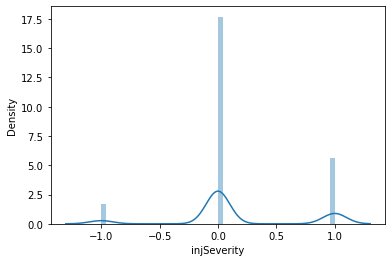

In [74]:
sns.distplot(y_test-predict)

# Decision Tree

In [75]:
from sklearn import tree

In [76]:
clf = tree.DecisionTreeClassifier()

In [77]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [78]:
predict = clf.predict(X_test)

In [79]:
Decision = accuracy_score(y_test,predict)

In [80]:
Decision

0.6712211784799317

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='injSeverity', ylabel='Density'>

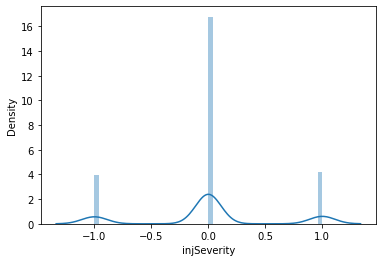

In [81]:
sns.distplot(y_test-predict)

In [82]:
mydata = [
    ["KNN", KNN],
    ["Random Forest", Random],
    ["SVM", SVM],
    ["Decision Tree", Decision],
    ["Logistic", Log]
]
 
head = ["Algoritm", "Accuracy"]

In [83]:
print(tabulate(mydata, headers=head, tablefmt="grid"))

+---------------+------------+
| Algoritm      |   Accuracy |
+===============+============+
| KNN           |   0.666667 |
+---------------+------------+
| Random Forest |   0.729576 |
+---------------+------------+
| SVM           |   0.666667 |
+---------------+------------+
| Decision Tree |   0.671221 |
+---------------+------------+
| Logistic      |   0.707657 |
+---------------+------------+
